In [3]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

data.shape, labels.shape, labels

(torch.Size([150, 4]),
 torch.Size([150]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2]))

In [4]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=.8)

train_data = torch.utils.data.TensorDataset(train_data, train_labels)
test_data = torch.utils.data.TensorDataset(test_data, test_labels)

train_loader = DataLoader(train_data, shuffle=True, batch_size=12)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [8]:
def create_model():
    ANNiris = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3)
    )

    loss_fun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=.01)
    
    return ANNiris, loss_fun, optimizer


In [9]:
ANNiris, loss_fun, optimizer = create_model()

In [11]:
epochs = 500

def train_model():
    train_acc = []
    test_acc = []

    for i in range(epochs):
        batch_acc = []
        for X, y in train_loader:
            y_hat = ANNiris(X)
            loss = loss_fun(y_hat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_acc.append(100 * torch.mean((torch.argmax(y_hat, axis=1) == y).float()).item())
        
        train_acc.append(np.mean(batch_acc))
        
        X, y = next(iter(test_loader))
        pred_labels = torch.argmax(ANNiris(X), axis=1)
        test_acc.append(100*torch.mean((pred_labels == y).float()).item())
    
    return train_acc, test_acc

In [12]:
train_acc,test_acc = train_model()

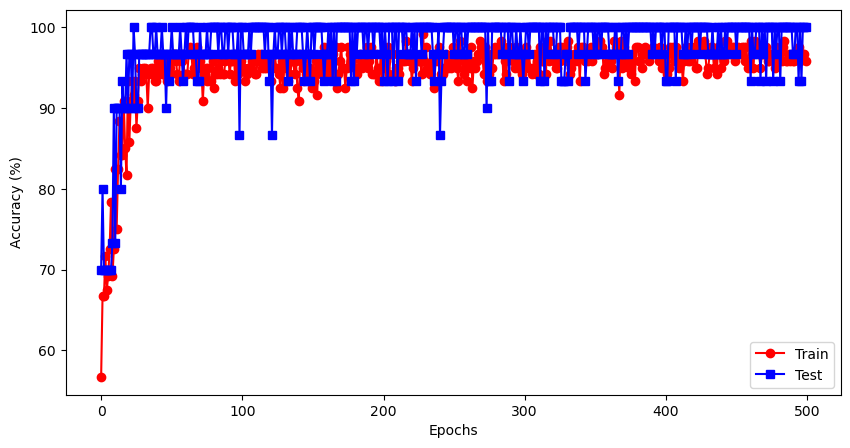

In [13]:
# plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(train_acc,'ro-')
plt.plot(test_acc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])

plt.show()